In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

from sklearn import preprocessing
%matplotlib inline

In [2]:
df_campaign = pd.read_csv('campaign_data.csv')
#df_campaign.set_index('campaign_id',inplace=True)
#df_campaign.sort_index()
df_campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [3]:
df_campaign['start_date'] = pd.to_datetime(df_campaign['start_date'],dayfirst = True)
df_campaign['end_date'] = pd.to_datetime(df_campaign['end_date'],dayfirst=True)
df_campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,2013-12-20
1,25,Y,2013-10-21,2013-11-22
2,20,Y,2013-09-07,2013-11-16
3,23,Y,2013-10-08,2013-11-15
4,21,Y,2013-09-16,2013-10-18


In [4]:
df_campaign['Diff Start and end date'] = df_campaign['end_date']-df_campaign['start_date']
df_campaign['Diff Start and end date'] = df_campaign['Diff Start and end date']/np.timedelta64(1,'D')
df_campaign.head()

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date
0,24,Y,2013-10-21,2013-12-20,60.0
1,25,Y,2013-10-21,2013-11-22,32.0
2,20,Y,2013-09-07,2013-11-16,70.0
3,23,Y,2013-10-08,2013-11-15,38.0
4,21,Y,2013-09-16,2013-10-18,32.0


In [5]:
#df_train = pd.read_csv('train.csv')
#df_train.head()

In [6]:
#pd.merge(df_campaign,df_train,on='campaign_id').head()

C:\Users\Pankaj\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734685.0, 735234.0)

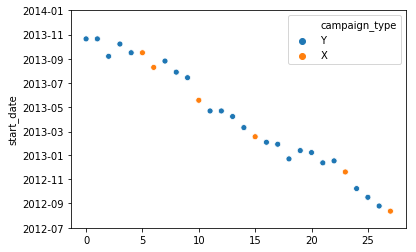

In [7]:
import seaborn as sns
sns.scatterplot(y='start_date',hue='campaign_type',x=df_campaign.index,data=df_campaign)
#plt.ylim(2012,2014)
plt.ylim('2012-07-01','2014-01-01')

In [8]:
df_campaign['Diff Start and end date']

0     60.0
1     32.0
2     70.0
3     38.0
4     32.0
5     32.0
6     55.0
7     32.0
8     32.0
9     32.0
10    47.0
11    46.0
12    32.0
13    32.0
14    32.0
15    48.0
16    34.0
17    32.0
18    56.0
19    34.0
20    32.0
21    37.0
22    32.0
23    46.0
24    53.0
25    61.0
26    63.0
27    40.0
Name: Diff Start and end date, dtype: float64

In [9]:
df_campaign.head(20)

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date
0,24,Y,2013-10-21,2013-12-20,60.0
1,25,Y,2013-10-21,2013-11-22,32.0
2,20,Y,2013-09-07,2013-11-16,70.0
3,23,Y,2013-10-08,2013-11-15,38.0
4,21,Y,2013-09-16,2013-10-18,32.0
5,22,X,2013-09-16,2013-10-18,32.0
6,18,X,2013-08-10,2013-10-04,55.0
7,19,Y,2013-08-26,2013-09-27,32.0
8,17,Y,2013-07-29,2013-08-30,32.0
9,16,Y,2013-07-15,2013-08-16,32.0


In [10]:
df_campaign = pd.concat([df_campaign,pd.get_dummies(df_campaign['campaign_type'],drop_first=True)], axis=1)

In [11]:
df_campaign.head()

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date,Y
0,24,Y,2013-10-21,2013-12-20,60.0,1
1,25,Y,2013-10-21,2013-11-22,32.0,1
2,20,Y,2013-09-07,2013-11-16,70.0,1
3,23,Y,2013-10-08,2013-11-15,38.0,1
4,21,Y,2013-09-16,2013-10-18,32.0,1


In [12]:
df_campaign

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date,Y
0,24,Y,2013-10-21,2013-12-20,60.0,1
1,25,Y,2013-10-21,2013-11-22,32.0,1
2,20,Y,2013-09-07,2013-11-16,70.0,1
3,23,Y,2013-10-08,2013-11-15,38.0,1
4,21,Y,2013-09-16,2013-10-18,32.0,1
5,22,X,2013-09-16,2013-10-18,32.0,0
6,18,X,2013-08-10,2013-10-04,55.0,0
7,19,Y,2013-08-26,2013-09-27,32.0,1
8,17,Y,2013-07-29,2013-08-30,32.0,1
9,16,Y,2013-07-15,2013-08-16,32.0,1


In [13]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
campaign_id                28 non-null int64
campaign_type              28 non-null object
start_date                 28 non-null datetime64[ns]
end_date                   28 non-null datetime64[ns]
Diff Start and end date    28 non-null float64
Y                          28 non-null uint8
dtypes: datetime64[ns](2), float64(1), int64(1), object(1), uint8(1)
memory usage: 1.2+ KB
